In [1]:
import math, random, pylab, numpy as np, sys, os, mpl_toolkits.mplot3d
%matplotlib notebook

In [2]:
def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def pi_x(x, beta):
    sigma = 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0))
    return math.exp(-x ** 2 / (2.0 * sigma ** 2)) / math.sqrt(2.0 * math.pi) / sigma

beta = 2.0
nsteps = 1000000
low = levy_harmonic_path(2)
high = low[:]
par1=[]
par0=[]
data = []
for step in range(nsteps):
    k = random.choice([0, 1])
    low[k] = levy_harmonic_path(1)[0]
    high[k] = low[k]
    par0.append(high[0])
    par1.append(high[1])


<function matplotlib.pyplot.show(close=None, block=None)>

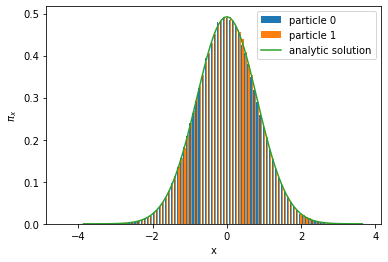

In [56]:
x=[par0,par1]
y=[]
x_range=np.linspace(min(par0),max(par0),100)
for i in range(len(x_range)):
    y.append(pi_x(x_range[i],beta))


pylab.hist(x,label=['particle 0','particle 1'],bins=100,density=True)
pylab.plot(x_range,y,'-',label='analytic solution')
pylab.xlabel('x')
pylab.ylabel('$\pi_x$')
pylab.legend()
pylab.savefig('A1.png')
pylab.show

In [ ]:
#I added an array to record the configuration of 2 particles in a high slice after each step. The histogram function was plotted by this array, while analytic solution is taken in range of (min(x of particle 0), max(x of particle 0). These results are agreed to each other.

<function matplotlib.pyplot.show(close=None, block=None)>

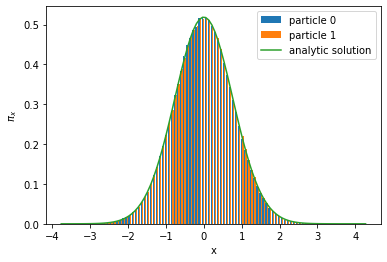

In [58]:
def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

def z(beta):
    return 1.0 / (1.0 - math.exp(- beta))

def pi_two_bosons(x, beta):
    pi_x_1 = math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta / 2.0))
    pi_x_2 = math.sqrt(math.tanh(beta)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta))
    weight_1 = z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta))
    weight_2 = z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta))
    pi_x = pi_x_1 * weight_1 + pi_x_2 * weight_2
    return pi_x

beta = 2.0
nsteps = 500000
low = levy_harmonic_path(2)
high = low[:]
par1=[]
par0=[]
data = []
for step in range(nsteps):
    # move 1
    if low[0] == high[0]:
        k = random.choice([0, 1])
        low[k] = levy_harmonic_path(1)[0]
        high[k] = low[k]
    else:
        low[0], low[1] = levy_harmonic_path(2)
        high[1] = low[0]
        high[0] = low[1]
    data += low[:]
    # move 2
    weight_old = (rho_harm_1d(low[0], high[0], beta) *
                  rho_harm_1d(low[1], high[1], beta))
    weight_new = (rho_harm_1d(low[0], high[1], beta) *
                  rho_harm_1d(low[1], high[0], beta))
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        high[0], high[1] = high[1], high[0]
    
    par0.append(high[0])
    par1.append(high[1])
    
x=[par0,par1]
y=[]
x_range=np.linspace(min(par0),max(par0),100)
for i in range(len(x_range)):
    y.append(pi_two_bosons(x_range[i],beta))


pylab.hist(x,label=['particle 0','particle 1'],bins=100,density=True)
pylab.plot(x_range,y,'-',label='analytic solution')
pylab.xlabel('x')
pylab.ylabel('$\pi_x$')
pylab.legend()
pylab.savefig('A2.png')
pylab.show

In [ ]:
#z(beta) is the partition function at temperature beta. In two weight, it dictates the probability of having two cycles. Finally, pi_x is the diagonal density matrix value of the particle.  

In [3]:
def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

def z(beta):
    return 1.0 / (1.0 - math.exp(- beta))

def pi_two_bosons(x, beta):
    pi_x_1 = math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta / 2.0))
    pi_x_2 = math.sqrt(math.tanh(beta)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta))
    weight_1 = z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta))
    weight_2 = z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta))
    pi_x = pi_x_1 * weight_1 + pi_x_2 * weight_2
    return pi_x

list_beta = []
nsteps = 500000
P1=[]
P2=[]

for i in range(50):
    beta=0.1*(i+1)
    low = levy_harmonic_path(2)
    high = low[:]
    N_1cyc=0
    N_2cyc=0
    data = []
    for step in range(nsteps):
        # move 1
        if low[0] == high[0]:
            k = random.choice([0, 1])
            low[k] = levy_harmonic_path(1)[0]
            high[k] = low[k]
        else:
            low[0], low[1] = levy_harmonic_path(2)
            high[1] = low[0]
            high[0] = low[1]
        data += low[:]
        # move 2
        weight_old = (rho_harm_1d(low[0], high[0], beta) *
                      rho_harm_1d(low[1], high[1], beta))
        weight_new = (rho_harm_1d(low[0], high[1], beta) *
                      rho_harm_1d(low[1], high[0], beta))
        if random.uniform(0.0, 1.0) < weight_new / weight_old:
            high[0], high[1] = high[1], high[0]
    
        par0.append(high[0])
        par1.append(high[1])
    
        if high==low:
            N_2cyc+=1
        else:
            N_1cyc+=1
    P1.append(N_1cyc/(N_1cyc+N_2cyc))
    P2.append(N_2cyc/(N_1cyc+N_2cyc))
    list_beta.append(beta)

fract_two_cycles = [z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]
fract_one_cycle = [z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]


pylab.plot(list_beta,P1,'o',label='1 cycle')
pylab.plot(list_beta,fract_one_cycle,label='analytic solution of 1 cycle')
pylab.plot(list_beta,P2,'o',label='2 cycles')
pylab.plot(list_beta,fract_two_cycles,label='analytic solution of 2 cycles')
pylab.xlabel('x')
pylab.ylabel('$\pi_x$')
pylab.legend()
pylab.savefig('A2_2.png')
pylab.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

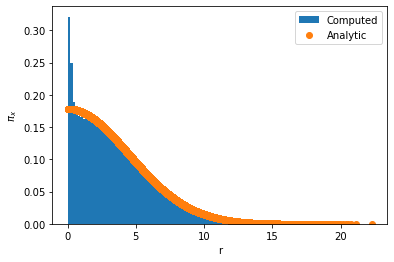

In [3]:
def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

def prob_r_distinguishable(r, beta):
    sigma = math.sqrt(2.0) / math.sqrt(2.0 * math.tanh(beta / 2.0))
    prob = (math.sqrt(2.0 / math.pi) / sigma) * math.exp(- r ** 2 / 2.0 / sigma ** 2)
    return prob

beta = 0.1
nsteps = 1000000
low_1, low_2 = levy_harmonic_path(2)
x = {low_1:low_1, low_2:low_2}
r=[]
data = []
for step in range(nsteps):
    # move 1
    a = random.choice(list(x.keys()))
    if a == x[a]:
        dummy = x.pop(a)
        a_new = levy_harmonic_path(1)[0]
        x[a_new] = a_new
    else:
        a_new, b_new = levy_harmonic_path(2)
        x = {a_new:b_new, b_new:a_new}
    # move 2
    (low1, high1), (low2, high2) = x.items()
    weight_old = rho_harm_1d(low1, high1, beta) * rho_harm_1d(low2, high2, beta)
    weight_new = rho_harm_1d(low1, high2, beta) * rho_harm_1d(low2, high1, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        x = {low1:high2, low2:high1}
    r.append(abs(list(x.keys())[1] - list(x.keys())[0]))

anar=[]
for i in r:
    anar.append(prob_r_distinguishable(i, beta))

pylab.hist(r,density=True,bins=120,label='Computed')
pylab.plot(r,anar,'o',label='Analytic')

pylab.xlabel('r')
pylab.ylabel('$\pi_x$')
pylab.legend()
pylab.savefig('A3.png')
pylab.show

In [ ]:
#At small r, the probability is highly significant, which is obvious due to boson bunching at low temperature.

(-6.31340302184862, -3.5422101850823107, -3.7769315156033922) (-6.31340302184862, -3.5422101850823107, -3.7769315156033922)
(3.951332224548148, -4.8781526183959905, 2.6716374137906764) (3.951332224548148, -4.8781526183959905, 2.6716374137906764)
(-0.9682614099847119, 2.204552000440248, 2.2600273105200555) (-0.9682614099847119, 2.204552000440248, 2.2600273105200555)
(-1.6928291786900418, 1.2967426703548361, 5.644727239379698) (-1.6928291786900418, 1.2967426703548361, 5.644727239379698)
(4.246798179118025, 3.4891238788917116, -1.31047694090552) (4.246798179118025, 3.4891238788917116, -1.31047694090552)
(2.124547929453545, 6.43320839541384, -0.6490868207655236) (2.124547929453545, 6.43320839541384, -0.6490868207655236)
(7.391167262575052, 2.731552356944809, -1.0201574898865493) (7.391167262575052, 2.731552356944809, -1.0201574898865493)
(-0.28666521365319575, -1.7659327807889493, -1.238630770774196) (-0.28666521365319575, -1.7659327807889493, -1.238630770774196)
(3.7841482874037364, 4.633

C:\Users\DELL\AppData\Local\Temp\ipykernel_13572\1697260094.py:91: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)


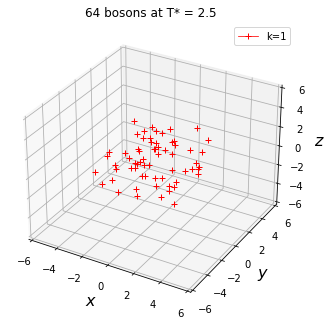

In [31]:
def levy_harmonic_path_3d(k):
    x0 = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [x0]
    for j in range(1, k):
        Upsilon_1 = 1.0 / math.tanh(beta) + 1.0 / \
                          math.tanh((k - j) * beta)
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + x[0][d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d(x, xp):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 64
T_star = 2.5
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
# Initial condition
positions = {}
for k in range(N):
    a = levy_harmonic_path_3d(1)
    positions[a[0]] = a[0]
# Monte Carlo loop
nsteps = 10000
for step in range(nsteps):
    # move 1: resample one permutation cycle
    boson_a = random.choice(list(positions.keys()))
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
           boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path_3d(k)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    # move 2: exchange
    a_1 = random.choice(list(positions.keys()))
    b_1 = positions.pop(a_1)
    a_2 = random.choice(list(positions.keys()))
    b_2 = positions.pop(a_2)
    weight_new = rho_harm_3d(a_1, b_2) * rho_harm_3d(a_2, b_1)
    weight_old = rho_harm_3d(a_1, b_1) * rho_harm_3d(a_2, b_2)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
for boson in list(positions.keys()):
    print (boson, positions[boson])
    
filename = 'data_boson_configuration.txt'
positions = {}
if os.path.isfile(filename):
    f = open(filename, 'r')
    for line in f:
        a = line.split()
        positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
               tuple([float(a[3]), float(a[4]), float(a[5])])
    f.close()
    if len(positions) != N:
        sys.exit('ERROR in the input file.')
    print ('Starting from file', filename)
else:
    for k in range(N):
        a = levy_harmonic_path_3d(1)
        positions[a[0]] = a[0]
    print ('Starting from a new configuration')

f = open(filename, 'w')
for a in positions:
   b = positions[a]
   f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
           str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
f.close()

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)

n_colors = 10
list_colors = pylab.cm.rainbow(np.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = list(positions_copy.keys())[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
pylab.title(str(N) + ' bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 6.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('plot_boson_configuration.png')
pylab.show()

In [6]:
def levy_harmonic_path_3d(k):
    x0 = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [x0]
    for j in range(1, k):
        Upsilon_1 = 1.0 / math.tanh(beta) + 1.0 / \
                          math.tanh((k - j) * beta)
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + x[0][d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d(x, xp):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 64
T_star = 0.7
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
# Initial condition
positions = {}
for k in range(N):
    a = levy_harmonic_path_3d(1)
    positions[a[0]] = a[0]
# Monte Carlo loop
nsteps = 10000
for step in range(nsteps):
    # move 1: resample one permutation cycle
    boson_a = random.choice(list(positions.keys()))
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
           boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path_3d(k)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    # move 2: exchange
    a_1 = random.choice(list(positions.keys()))
    b_1 = positions.pop(a_1)
    a_2 = random.choice(list(positions.keys()))
    b_2 = positions.pop(a_2)
    weight_new = rho_harm_3d(a_1, b_2) * rho_harm_3d(a_2, b_1)
    weight_old = rho_harm_3d(a_1, b_1) * rho_harm_3d(a_2, b_2)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
for boson in list(positions.keys()):
    print (boson, positions[boson])
    
filename = 'data_boson_configuration.txt'
positions = {}
if os.path.isfile(filename):
    f = open(filename, 'r')
    for line in f:
        a = line.split()
        positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
               tuple([float(a[3]), float(a[4]), float(a[5])])
    f.close()
    if len(positions) != N:
        sys.exit('ERROR in the input file.')
    print ('Starting from file', filename)
else:
    for k in range(N):
        a = levy_harmonic_path_3d(1)
        positions[a[0]] = a[0]
    print ('Starting from a new configuration')

f = open(filename, 'w')
for a in positions:
   b = positions[a]
   f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
           str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
f.close()

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)

n_colors = 10
list_colors = pylab.cm.rainbow(np.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = list(positions_copy.keys())[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
pylab.title(str(N) + ' bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 6.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('plot_boson_configuration-T=0.7.png')
pylab.show()

(-2.118178584044827, -1.698298630465918, -0.3553689645603961) (-2.118178584044827, -1.698298630465918, -0.3553689645603961)
(0.26447634214564086, 0.17796424377461822, 2.3000266601680317) (0.26447634214564086, 0.17796424377461822, 2.3000266601680317)
(-1.6088975550613014, -0.49252261892926663, -1.5789558819838934) (-1.6088975550613014, -0.49252261892926663, -1.5789558819838934)
(-0.7575244401463435, 0.5257476989317399, -1.1664055508226658) (-0.7575244401463435, 0.5257476989317399, -1.1664055508226658)
(-0.017804801015286427, 1.7717000517994455, -1.7794059154719009) (-0.017804801015286427, 1.7717000517994455, -1.7794059154719009)
(-0.19916717575319268, -0.12327980512521078, -1.9602063771054752) (-0.19916717575319268, -0.12327980512521078, -1.9602063771054752)
(-1.0459545199843177, -2.5282850478102317, 0.28771953843149006) (-1.0459545199843177, -2.5282850478102317, 0.28771953843149006)
(0.4196910809573372, -0.2231540477862014, -0.6477240494804971) (0.4196910809573372, -0.2231540477862014,

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [5]:
#At low T=0.7, particle favor in long cycles and condensate more to the center while at higher temperature T=2.5, the short cycles dominates

In [7]:
def levy_harmonic_path_3d(k):
    x0 = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 *
                math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [x0]
    for j in range(1, k):
        Upsilon_1 = 1.0 / math.tanh(beta) + 1.0 / \
                          math.tanh((k - j) * beta)
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + x[0][d] /
                     math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d(x, xp):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 *
                    math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 /
                    math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 512
T_star = 0.8
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
# Initial condition
positions = {}
for k in range(N):
    a = levy_harmonic_path_3d(1)
    positions[a[0]] = a[0]
# Monte Carlo loop
nsteps = 1000000
cycle_min=10
x0=[]
x1=[]

for step in range(nsteps):
    # move 1: resample one permutation cycle
    boson_a = random.choice(list(positions.keys()))
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
           boson_a = boson_b
    x0.append(boson_a[0])
    k = len(perm_cycle)
    if k>cycle_min:
        x1.append(boson_a[0])
    perm_cycle = levy_harmonic_path_3d(k)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    # move 2: exchange
    a_1 = random.choice(list(positions.keys()))
    b_1 = positions.pop(a_1)
    a_2 = random.choice(list(positions.keys()))
    b_2 = positions.pop(a_2)
    weight_new = rho_harm_3d(a_1, b_2) * rho_harm_3d(a_2, b_1)
    weight_old = rho_harm_3d(a_1, b_1) * rho_harm_3d(a_2, b_2)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
for boson in list(positions.keys()):
    print (boson, positions[boson])
    

pylab.hist([x0,x1], density=True, bins=100, label=['positions', 'cycle length > ' + str(cycle_min)])
xs = [0.1*i -3 for i in range(61)]
pylab.plot(xs, [math.exp(-x*x)/math.sqrt(math.pi) for x in xs],label='Analytic function')
pylab.xlim(-3,3)
pylab.xlabel('x')
pylab.ylabel('$\pi_x$')
pylab.legend()
pylab.savefig('B2.png')

(0.5411237994648077, -2.0746363679090494, 0.8198018898131024) (0.5411237994648077, -2.0746363679090494, 0.8198018898131024)
(-7.991741671253681, -2.2818774086977016, -0.05828992963222504) (-7.991741671253681, -2.2818774086977016, -0.05828992963222504)
(2.3305158137835216, 2.5927248144984354, -2.7550927879728877) (2.3305158137835216, 2.5927248144984354, -2.7550927879728877)
(6.191652263786294, 2.487991441532942, -2.11741166430491) (6.191652263786294, 2.487991441532942, -2.11741166430491)
(-3.222201827936315, -1.3759740325769874, 4.478313841707686) (-3.222201827936315, -1.3759740325769874, 4.478313841707686)
(4.49014220800466, 4.2115105767146, -2.8410768586885875) (4.49014220800466, 4.2115105767146, -2.8410768586885875)
(-0.47855491288230545, 0.1854890837873601, -0.4515092605746597) (-0.47855491288230545, 0.1854890837873601, -0.4515092605746597)
(0.274965061381994, 3.6021025356248737, -2.8873112015590534) (0.274965061381994, 3.6021025356248737, -2.8873112015590534)
(1.5586701031610868, 2

<IPython.core.display.Javascript object>

In [8]:


def levy_harmonic_path_3d_anisotropic(k):
    sigma = [1.0 / math.sqrt(2.0 * omega[d] *
             math.tanh(0.5 * k * beta * omega[d])) for d in range(3)]
    xk = tuple([random.gauss(0.0, sigma[d]) for d in range(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = [1.0 / math.tanh(beta * omega[d]) +
              1.0 / math.tanh((k - j) * beta * omega[d]) for d in range(3)]
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta * omega[d]) + \
               xk[d] / math.sinh((k - j) * beta * omega[d]) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1[d] for d in range(3)]
        sigma = [1.0 / math.sqrt(Upsilon_1[d] * omega[d]) for d in range(3)]
        dummy = [random.gauss(x_mean[d], sigma[d]) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm_3d_anisotropic(x, xp, beta):
    Upsilon_1 = sum(omega[d] * (x[d] + xp[d]) ** 2 / 4.0 *
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    Upsilon_2 = sum(omega[d] * (x[d] - xp[d]) ** 2 / 4.0 /
                     math.tanh(beta * omega[d] / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 512
nsteps = 100000
omega_harm = 1.0
omega = [1.0, 5.0, 1.0]
for d in range(3):
    omega_harm *= omega[d] ** (1.0 / 3.0)
T_star = 0.7
T = T_star * omega_harm * N ** (1.0 / 3.0)
beta = 1.0 / T
print ('omega: ', omega)
# Initial condition
filename = 'data_boson_configuration_anisotropic.txt'
positions = {}
if os.path.isfile(filename):
    f = open(filename, 'r')
    for line in f:
        a = line.split()
        positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = \
               tuple([float(a[3]), float(a[4]), float(a[5])])
    f.close()
    if len(positions) != N:
        sys.exit('ERROR in the input file.')
    print ('starting from file', filename)
else:
    for k in range(N):
        a = levy_harmonic_path_3d_anisotropic(1)
        positions[a[0]] = a[0]
    print ('Starting from a new configuration')
for step in range(nsteps):
    boson_a = random.choice(list(positions.keys()))
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]: break
        else: boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path_3d_anisotropic(k)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(list(positions.keys()))
    b_1 = positions.pop(a_1)
    a_2 = random.choice(list(positions.keys()))
    b_2 = positions.pop(a_2)
    weight_new = (rho_harm_3d_anisotropic(a_1, b_2, beta) *
                  rho_harm_3d_anisotropic(a_2, b_1, beta))
    weight_old = (rho_harm_3d_anisotropic(a_1, b_1, beta) *
                  rho_harm_3d_anisotropic(a_2, b_2, beta))
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1], positions[a_2] = b_2, b_1
    else:
        positions[a_1], positions[a_2] = b_1, b_2

f = open(filename, 'w')
for a in positions:
   b = positions[a]
   f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' +
           str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
f.close()

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)

n_colors = 10
list_colors = pylab.cm.rainbow(np.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = list(positions_copy.keys())[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson: break
        else: boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)
pylab.title(str(N) + ' bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_box_aspect((len(x), len(y), len(z))) 
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 8.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('C1 '+ str(omega) +'.png')
pylab.show()

omega:  [1.0, 5.0, 1.0]
Starting from a new configuration


<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [ ]:
#In both T*=1.2 and 0.5, the bose-einstein condensation sets in these formulas with given omega configuration.